In [1]:
import numpy as np
import pandas as pd

from scipy.io import loadmat

from sklearn import svm

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
PATH = '../input/andrew_ng/'

In [3]:
data = loadmat(PATH+'ex6data1.mat')

In [4]:
data.keys()

dict_keys(['__header__', '__globals__', 'X', 'y', '__version__'])

In [5]:
X, y = data['X'], data['y']

In [6]:
X.shape, y.shape

((51, 2), (51, 1))

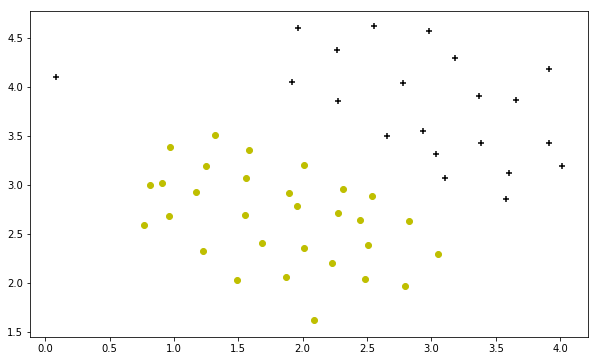

In [7]:
pos = X[(y==1).flatten(), :]
neg = X[(y==0).flatten(), :]

plt.figure(figsize=(10,6))
plt.scatter(pos[:,0], pos[:,1], marker='+', c='k')
plt.scatter(neg[:,0], neg[:,1], marker='o', c='y');

Accuracy: 1.0


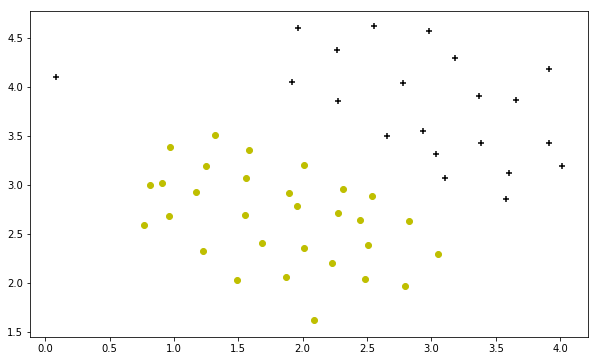

In [8]:
# with C = [1, 100]
c = 100  # change C to see the change in accuracy
clf = svm.SVC(C=c, kernel='linear')
clf.fit(X, y.ravel())
score = clf.score(X, y.ravel())
print("Accuracy: {}".format(score))

resp = clf.decision_function(X)

pos = X[(resp>0), :]
neg = X[(resp<0), :]

plt.figure(figsize=(10,6))
plt.scatter(pos[:,0], pos[:,1], marker='+', c='k')
plt.scatter(neg[:,0], neg[:,1], marker='o', c='y');

In [9]:
def gaussian_fn(X, sigma):
    return np.exp( -np.sum( (X[:,0]-X[:,1])**2 ) / (2*sigma**2) )

In [10]:
x1 = np.array([1.0, 2.0, 1.0])
x2 = np.array([0.0, 4.0, -1.0])

gaussian_fn(np.c_[x1, x2], 2)

0.32465246735834974

### data set 2

In [11]:
data = loadmat(PATH+'ex6data2.mat')
data.keys()

dict_keys(['__header__', '__globals__', 'X', 'y', '__version__'])

In [12]:
X, y = data['X'], data['y']
X.shape, y.shape

((863, 2), (863, 1))

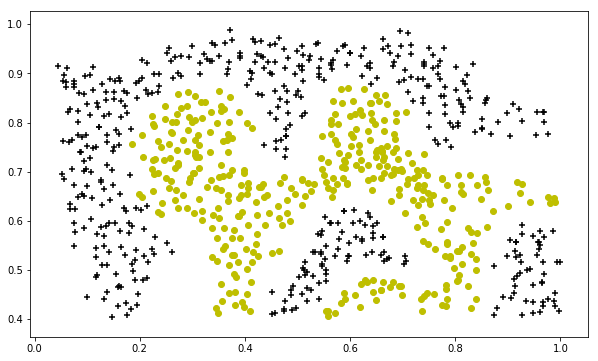

In [13]:
pos = X[(y==1).flatten(), :]
neg = X[(y==0).flatten(), :]

plt.figure(figsize=(10,6))
plt.scatter(pos[:,0], pos[:,1], marker='+', c='k')
plt.scatter(neg[:,0], neg[:,1], marker='o', c='y');

Accuracy: 0.9698725376593279


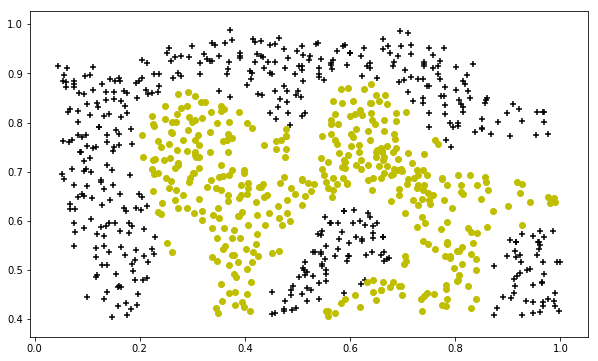

In [14]:
clf = svm.SVC(C=100, gamma=10, probability=True)
clf.fit(X, y.ravel())
score = clf.score(X, y.ravel())
print("Accuracy: {}".format(score))

resp = clf.decision_function(X)

pos = X[(resp>0), :]
neg = X[(resp<0), :]

plt.figure(figsize=(10,6))
plt.scatter(pos[:,0], pos[:,1], marker='+', c='k')
plt.scatter(neg[:,0], neg[:,1], marker='o', c='y');

In [15]:
data = loadmat(PATH+'ex6data3.mat')
data.keys()

dict_keys(['__version__', 'y', 'Xval', 'yval', '__header__', '__globals__', 'X'])

In [16]:
X, y = data['X'], data['y']
X.shape, y.shape

((211, 2), (211, 1))

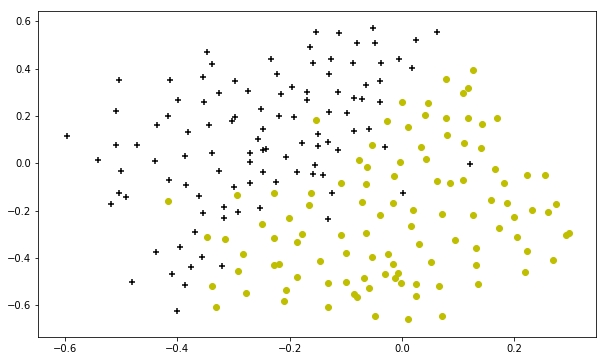

In [17]:
pos = X[(y==1).flatten(), :]
neg = X[(y==0).flatten(), :]

plt.figure(figsize=(10,6))
plt.scatter(pos[:,0], pos[:,1], marker='+', c='k')
plt.scatter(neg[:,0], neg[:,1], marker='o', c='y');

### Spam Classifier

In [18]:
spam_train = loadmat(PATH+'spamTrain.mat')
spam_test = loadmat(PATH+'spamTest.mat')

In [19]:
X_train = spam_train['X']
y_train = spam_train['y']

X_test = spam_test['Xtest']
y_test = spam_test['ytest']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4000, 1899), (4000, 1), (1000, 1899), (1000, 1))

In [20]:
svc = svm.SVC()
svc.fit(X_train, y_train.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
svc.score(X_test, y_test)

0.953